### Importing Libraries 

In [45]:
!pip install wordcloud

In [46]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore') 

import spacy
import string
import re
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud


In [47]:
reviews =pd.read_csv(r"C:\Users\hornt\Documents\03.PROJECTS -\01. Datasets\P14.0flipkart_data.csv")
print(reviews.shape)
reviews.head()

(9976, 2)


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


### EDA 

rating
5    5726
4    2365
3     884
1     691
2     310
Name: count, dtype: int64


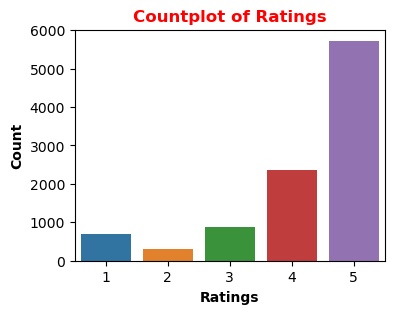

In [48]:
plt.figure(figsize=(4,3))
sns.countplot(data=reviews, x ='rating')
plt.xlabel('Ratings',weight ='bold')
plt.ylabel('Count',weight ='bold')
plt.title('Countplot of Ratings',weight ='bold',size =12,color ='red')
print(reviews['rating'].value_counts())
plt.show()

- **Defining sentiment classification based on ratings**
 - Ratings above or equal to 4 are considered positive sentiment 
 - Ratings below 4 are considdered negative

In [49]:
sentiment = [1 if reviews['rating'][i] >= 4 else 0 for i in range(len(reviews['rating'])) ]
reviews['label'] = sentiment 
reviews.drop(columns = ['rating'],inplace=True)
reviews.head()

,review,label
0,It was nice produt. I like it's design a lot. ...,1
1,awesome sound....very pretty to see this nd th...,1
2,awesome sound quality. pros 7-8 hrs of battery...,1
3,I think it is such a good product not only as ...,1
4,awesome bass sound quality very good bettary l...,1


In [107]:
reviews['label'].value_counts()

label
1    8091
0    1885
Name: count, dtype: int64

- **Word Cloud Plot of the words in labels**

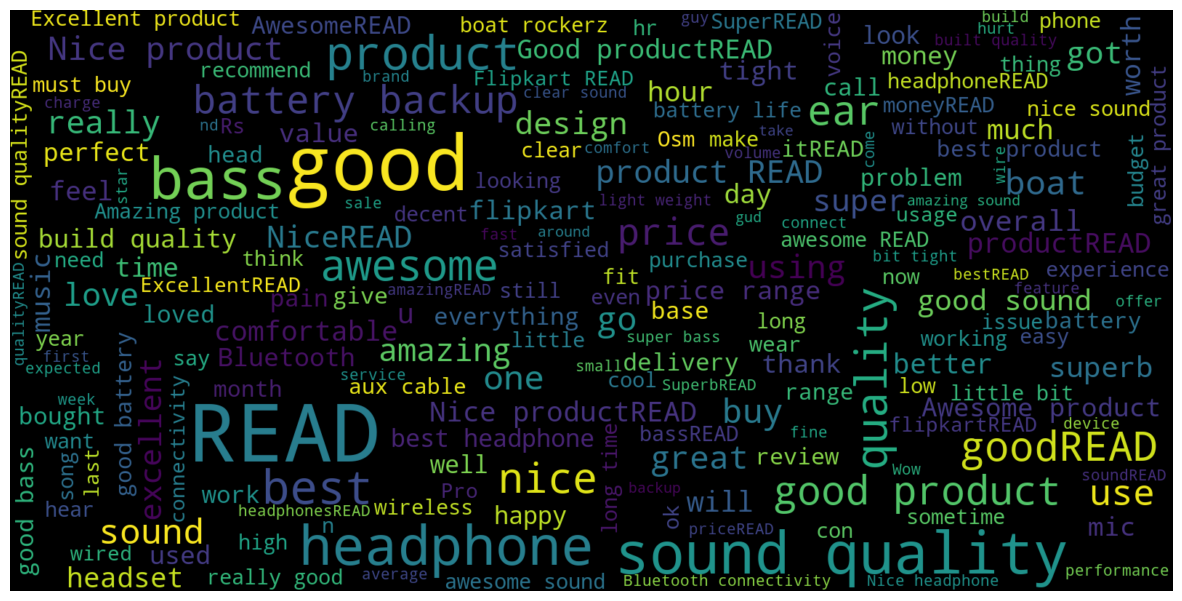

In [50]:
consolidated = ' '.join( 
    word for word in reviews['review'][reviews['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 8)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

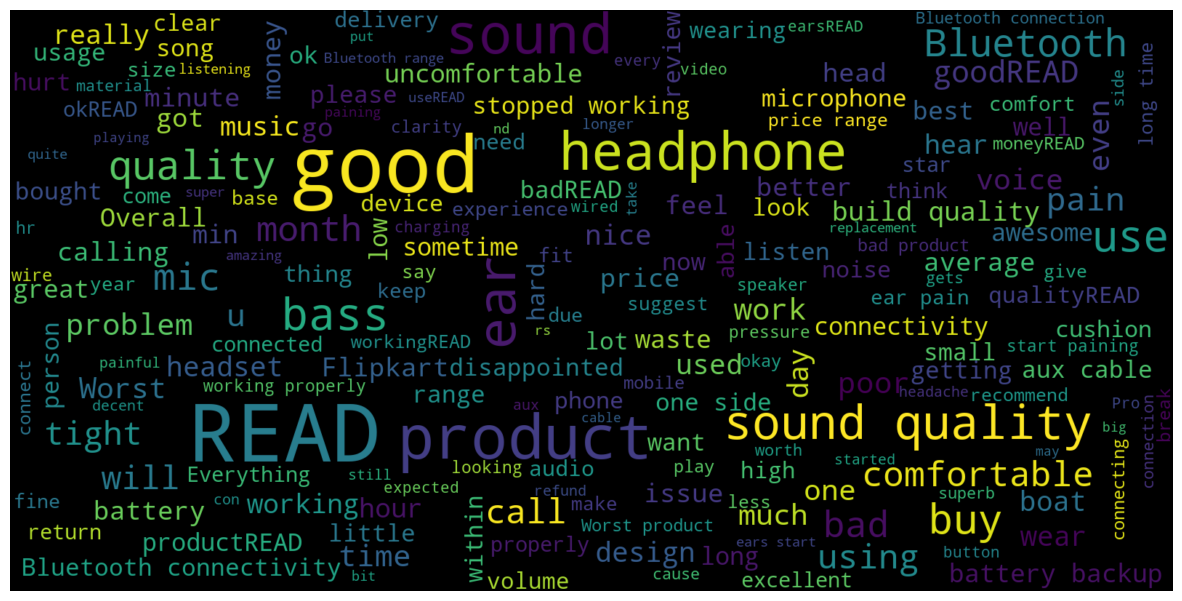

In [51]:
consolidated = ' '.join( 
    word for word in reviews['review'][reviews['label'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 8)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

### Pre-processing 

In [56]:
extra_punct = [    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾','═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲','è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø','¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']

punct_list =set(list(string.punctuation) + extra_punct)

In [61]:
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")

## to remove punctuations & stop words
def preprocess(text):
    doc = nlp(text)
    no_stop_words = [token.lemma_ for token in doc if not token.is_stop and token not in punct_list]
    return " ".join(no_stop_words)  

## to remove special characters
def rem_spl_char(x):
    x = re.sub(r'[^\w\s]+', ' ', x)
    x = ' '.join(x.split(' '))
    return x  

def spell_correct(x):
    sentence =TextBlob(x)
    return str(sentence.correct())
        

In [68]:
###### spell check is not good. hence not applied 
print(reviews['review'][4])
spell_correct(reviews['review'][4])

awesome bass sound quality good bettary long life   purchase rs 999   grateful product forget likeread


'awesome bass sound quality good better long life   purchase is 999   grateful product forget likened'

In [58]:
reviews['review'] =reviews['review'].apply(lambda x:x.lower())
reviews['review'] =reviews['review'].apply(preprocess)
reviews['review'] =reviews['review'].apply(rem_spl_char)

In [69]:
reviews

,review,label
0,nice produt like design lot easy carry ...,1
1,awesome sound pretty nd sound quality good w...,1
2,awesome sound quality pro 7 8 hrs battery ...,1
3,think good product quality design good m pro...,1
4,awesome bass sound quality good bettary long l...,1
...,...,...
9971,goodread,1
9972,amazimg build light read,1
9973,goodread,1
9974,good headphone read,1


### Model Building 

In [96]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score,RandomizedSearchCV


## gradient descent based classification algorithms
from sklearn.linear_model import LogisticRegression

### ensemble based classification algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Tree based classification algorithms 
from sklearn.tree import DecisionTreeClassifier#

## Bayesian Models 
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score,f1_score, log_loss

In [97]:
X_train, X_test, y_train, y_test = train_test_split(reviews['review'], reviews['label'], 
                                                    test_size=0.2,random_state =45,stratify =reviews['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7980,) (1996,) (7980,) (1996,)


In [98]:
v = TfidfVectorizer()
X_train_cv = v.fit_transform(list(X_train))
X_test_cv = v.transform(list(X_test))
print(X_train_cv.shape)
print(X_test_cv.shape)

(7980, 5689)
(1996, 5689)


#### Model Selection using Cross Val Scores 

In [102]:
scorings =['accuracy','balanced_accuracy']
#define a dataframe 
CrossVal_Test =pd.DataFrame( columns=['Model','accuracy','balanced_accuracy'])

def score_models(model_name, model,i):   
    score_lst =[]
    score_lst.append(model_name)
    for j in range(len(scorings)):
        score = cross_val_score(model, X_train_cv, y_train, cv=5, scoring= scorings[j])
        #     print("{} average: {}".format(model_name, score.mean()))
        score_lst.append(score.mean())
    CrossVal_Test.loc[i] =score_lst

In [103]:
models = {"Logistic Regression": LogisticRegression(),
          # ensemble models
          "RandomForestClassifier":RandomForestClassifier(),
        'SupportVectorMachine' : SVC(),
          ## tree based classifiers
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          ## bayesian Models 
          "NaivesBayes" :MultinomialNB()
         }

In [104]:
for i in range(len([*models])):
    score_models([*models][i],models[[*models][i]],i)

CrossVal_Test.head(10)   

,Model,accuracy,balanced_accuracy
0,Logistic Regression,0.868421,0.687720
1,RandomForestClassifier,0.882957,0.732621
2,SupportVectorMachine,0.876817,0.710441
3,DecisionTreeClassifier,0.847368,0.732575
4,NaivesBayes,0.834962,0.568670


#### Hyper Parameter Tuning 

In [99]:
models = {"Logistic Regression": LogisticRegression(),
          # ensemble models
          "RandomForestClassifier":RandomForestClassifier(),
        'SupportVectorMachine' : SVC(),
          ## tree based classifiers
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          ## bayesian Models 
          "NaivesBayes" :MultinomialNB()
         }

In [100]:
parameters = {
        ## gradient descent based models 
        "Logistic Regression": {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']},
          
          # Ensemble models
          "RandomForestClassifier":{'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
                                  #'max_features':['auto', 'sqrt'],
                                   'max_depth':[2,4],
                                    #'min_samples_split': [2, 5],
                                   #'min_samples_leaf': [1,2,3,4],
                                   'bootstrap': [True, False]},
              
          'SupportVectorMachine' : {'C':[0.125, 0.5, 1, 2, 8, 16]},
    
          ## tree based classifiers
          "DecisionTreeClassifier": { 'max_depth': np.arange(3,5,1)},
          ## Bayesian Models 
          "NaivesBayes" : {'alpha':[0.001,0.01,0.1,0.25,0.3,0.35,0.5,0.6,0.7,0.8,0.9,1,2,5]}
}

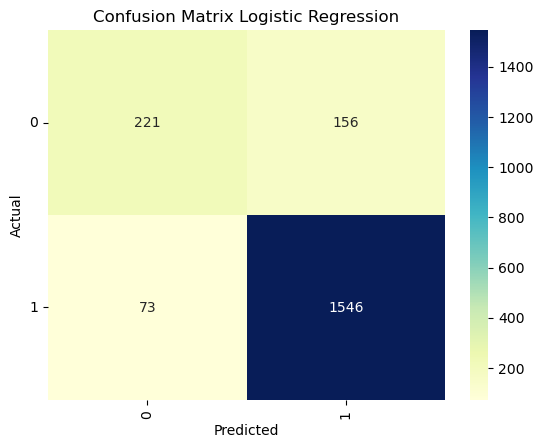

<Figure size 150x150 with 0 Axes>

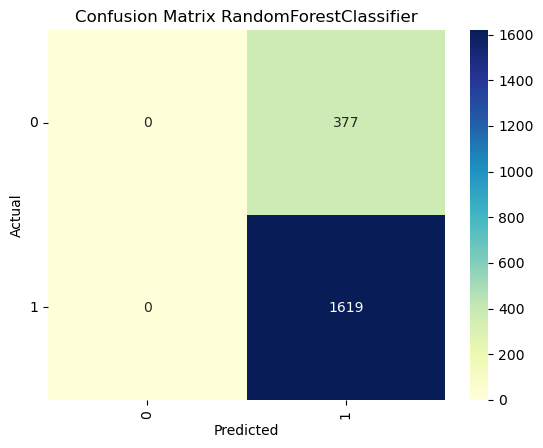

<Figure size 150x150 with 0 Axes>

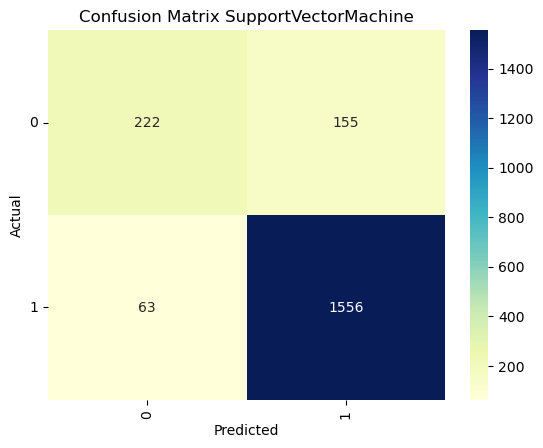

<Figure size 150x150 with 0 Axes>

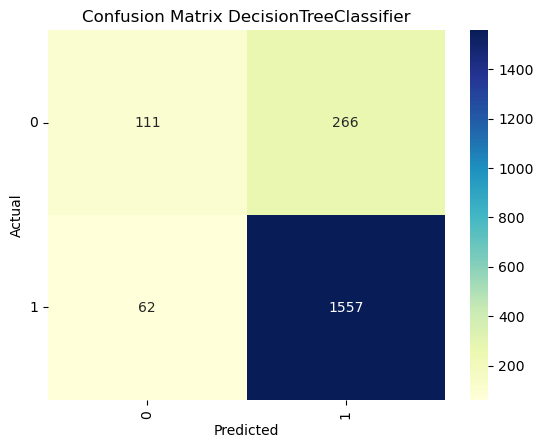

<Figure size 150x150 with 0 Axes>

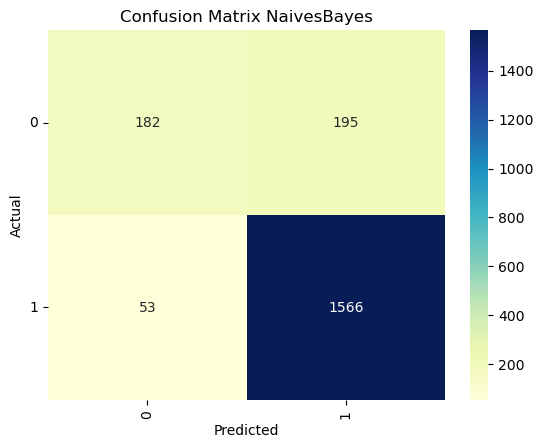

<Figure size 150x150 with 0 Axes>

,Model,Best_params,Accuracy,F1_score,Recall,Precision
0,Logistic Regression,"{'penalty': 'l2', 'C': 10}",0.89,0.79,0.77,0.83
1,RandomForestClassifier,"{'n_estimators': 80, 'max_depth': 4, 'bootstra...",0.81,0.45,0.50,0.41
2,SupportVectorMachine,{'C': 2},0.89,0.80,0.77,0.84
3,DecisionTreeClassifier,{'max_depth': 4},0.84,0.65,0.63,0.75
4,NaivesBayes,{'alpha': 0.1},0.88,0.76,0.73,0.83


In [101]:
score_model =[]
labels =[0,1]

for i in range(len([*models])):
    model = RandomizedSearchCV(estimator = models[[*models][i]], param_distributions = parameters[[*models][i]], 
                               cv = 4, verbose=0, n_jobs = 4)
    model.fit(X_train_cv,y_train)
    y_pred = model.predict(X_test_cv)
    lst = [[*models][i], model.best_params_, accuracy_score(y_test,y_pred).round(2), 
      f1_score(y_test, y_pred, average="macro").round(2),
      recall_score(y_test,y_pred,average ='macro').round(2),  #options for average [None, 'micro', 'macro', 'weighted'].
      precision_score(y_test,y_pred,average ='macro').round(2)]

    score_model.append(lst)
    
    cm  =pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_pred))
    fig,ax = plt.subplots()
    plt.figure(figsize=(1.5, 1.5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",ax=ax)
    ax.set_title(f"Confusion Matrix {[*models][i]}")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.xaxis.set_ticklabels(labels,rotation =90)
    ax.yaxis.set_ticklabels(labels,rotation =0)
    plt.show()


pd.DataFrame(score_model,columns =['Model','Best_params','Accuracy','F1_score','Recall','Precision'])
    